In [126]:
execfile('/home/feng/meta/header_0903.py')
bwMeta = pyutil.readData('/home/feng/meta/meta_chip.tsv')


[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


is in ipython: 1 
[WARN]No module named jinja2_util
is in ipython: 1 
[WARN]No module named jinja2_util


In [152]:
%%writefile /home/feng/figureScript/1121__makePeak__194C-4Cel.py

execfile("/home/feng/meta/header__script2figure.py")

ofname = '194C-4Cel.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="194C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
bwCurr = bwCurr.query('bname.str.contains("-4C")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname


pyutil.envSource('/home/feng/ref/config/config_Ath_TAIR10.sh')
GSIZE=pyutil.os.environ['GSIZE']
featSummit='%s.cds.summit'%(pyutil.os.environ['GTF'])

# peakDF = sdio.extract_peak(peakFile).set_index('acc',drop=0).reindex(ind)
# ofname = sutil.to_tsv(peakDF,'clu-EQ-1.narrowPeak')
peakSummit = sutil.npk_expandSummit(fname=ofname,
                                    center_summit=0,
                                    radius=1,)
ofname = sdio.job__nearAUG(peakSummit=peakSummit,
                           CUTOFF=4000,
                           GSIZE=GSIZE,
                           featSummit=featSummit,
                           peakWid=100,)
print (ofname)
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')

Overwriting /home/feng/figureScript/1121__makePeak__194C-4Cel.py


In [153]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__194C-4Cel.py"
res.grep('success')

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--   

In [ ]:
%%writefile /home/feng/figureScript/1121__makePeak__194C-all.py

execfile("/home/feng/meta/header__script2figure.py")

ofname = '194C-all.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="194C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


In [ ]:
%%writefile /home/feng/figureScript/1121__makePeak__ICE1-all.py

execfile("/home/feng/meta/header__script2figure.py")
ofname = '141C_ICE1.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="141C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


In [ ]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__ICE1-all.py"

In [145]:
%%writefile /home/feng/figureScript/1121__makePeak__ICE1-141CS15.py

execfile("/home/feng/meta/header__script2figure.py")
ofname = 'ICE1-141CS15.narrowPeak'

bwCurr = bwMeta
bwCurr = bwCurr.loc[['141CS14','141CS15']]

# bwCurr = bwMeta
# bwCurr = bwCurr.query('runID=="141C"')
# bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


Writing /home/feng/figureScript/1121__makePeak__ICE1-141CS15.py


In [150]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__ICE1-141CS15.py"
res.grep('success',)


['Success: True']

In [155]:
! ln /home/feng/repos/synotil/src/normalise_CPM.py /home/feng/repos/BrachyPhoton/synotil/

In [78]:
%%bash
envPull

cp: omitting directory '/home/feng/repos/synotil/src/config'


In [79]:
! chipShot.py -r 6000 -s1 -j6 -d0 -a {GTF} -b {bedFile}  {bwFlat} 

is in ipython: 0 
[WARN]No module named jinja2_util
[WARN] pymisca.vis_util cannot find network
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
is in ipython: 0 
[WARN]No module named jinja2_util
{
    "DIR": null, 
    "GSIZE": "/home/feng/ref/Brachypodium_Bd21_v3-1/genome.sizes", 
    "NCORE": 6, 
    "bedFile": "/home/feng/meta/key_ath.csv.cds.summit", 
    "bwFiles": [
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S0/Undetermined_S0_Ath-TAIR10_RPKM.bw", 
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S1/1487-22C-ZT10-RESEQ_S1_Ath-TAIR10_RPKM.bw", 
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S11/HDAC-HA-22C_S11_Ath-TAIR10_RPKM.bw", 
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S12/HDAC-HA-27C_S12_Ath-TAIR10_RPKM.bw", 
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S13/4196-22-ZT10_S13_Ath-TAIR10_RPKM.bw", 
        "/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S14/4196-27-ZT10_S1

[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT3G54040.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT4G28720.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT4G19860.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT3G46640.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT5G13640.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT4G14130.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT5G02810.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT2G43010.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT5G18030.svg
[MSG] plotting to: /home/feng/envs/CAMTA/PROG=chipShots_bedFile=key_ath.csv.cds.summit/AT5G

In [118]:
%%writefile /home/feng/figureScript/chipShots__141C-189C__CBF.py

execfile('/home/feng/meta/header__script2figure.py')
import synotil.chipShot

# bwCurr = bwMeta.query('runID=="182C"').query('bamFinal.str.contains("TAIR10")')
bwCurr = bwMeta
bwCurr = bwCurr.query('runID in ["141C","189C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|ICE1|CAMTA")')
bwFlat = ' '.join(bwCurr.RPKMFile)

# bedFile = '/home/feng/meta/key_ath.csv.cds.summit'
ofname = "input.cds.summit"
keyDF = pyutil.readData('/home/feng/meta/key_ath.csv')
GTF = '/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf'
GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'

Accs = '\|'.join(keyDF.index)
pyutil.shellexec('''grep {GTF}.cds -ie "{Accs}" > {ofname}'''.format(**locals()))
bedFile = ofname

# import
synotil.chipShot.main(
bedFile=bedFile,
bwFiles=bwCurr.fname,
trackNames = bwCurr.header,
gtfFile=GTF,
center_summit=1,
NCORE=6,
radius=6000,debug=0,
ylim=[0,300],
 GSIZE= GSIZE,
)

figs = {}

execfile('/home/feng/meta/footer__script2figure.py')

# ! chipShot.py -r 6000 -s1 -j6 -d0 -a {GTF} -b {bedFile}  {bwFlat} 

Writing /home/feng/figureScript/chipShots__141C-189C__CBF.py


In [110]:
%%writefile /home/feng/figureScript/chipShots__141C-194C__CBF.py

execfile('/home/feng/meta/header__script2figure.py')
# execfile('/home/feng/meta/header_0903.py')
# bwMeta 
# import synotil.chipShot as mod ;reload(mod)
import synotil.chipShot

# bwCurr = bwMeta.query('runID=="182C"').query('bamFinal.str.contains("TAIR10")')
bwCurr = bwMeta
bwCurr.bname=bwCurr.bname.str.split('_').str.get(0)
bwCurr = bwCurr.query('runID in ["141C","194C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|ICE1|CAMTA")')

# header = pyutil.paste0(bwMeta[['runID','sampleID','bname']].values.T,'_')
header  = map(str,bwCurr[['runID','sampleID','bname']].values)

bwFlat = ' '.join(bwCurr.RPKMFile)
# bedFile = '/home/feng/meta/key_ath.csv.cds.summit'
ofname = "input.cds.summit"
keyDF = pyutil.readData('/home/feng/meta/key_ath.csv')

GTF = '/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf'
GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'

Accs = '\|'.join(keyDF.index)
pyutil.shellexec('''grep {GTF}.cds -ie "{Accs}" > {ofname}'''.format(**locals()))
bedFile = ofname

# import
synotil.chipShot.main(
bedFile=bedFile,
bwFiles=bwCurr.fname,
trackNames = bwCurr.header,
gtfFile=GTF,
center_summit=1,
NCORE=6,
radius=6000,debug=0,
ylim=[0,300],
 GSIZE= GSIZE,
)

figs = {}

execfile('/home/feng/meta/footer__script2figure.py')

# ! chipShot.py -r 6000 -s1 -j6 -d0 -a {GTF} -b {bedFile}  {bwFlat} 

Overwriting /home/feng/figureScript/chipShots__141C-194C__CBF.py


In [108]:
%%writefile /home/feng/figureScript/chipShots__141C-194C__chipDB.py

execfile('/home/feng/meta/header__script2figure.py')
# execfile('/home/feng/meta/header_0903.py')
# bwMeta 
# import synotil.chipShot as mod ;reload(mod)
import synotil.chipShot

# bwCurr = bwMeta.query('runID=="182C"').query('bamFinal.str.contains("TAIR10")')
bwCurr = bwMeta
bwCurr.bname=bwCurr.bname.str.split('_').str.get(0)
bwCurr = bwCurr.query('runID in ["141C","194C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|ICE1|CAMTA")')
# header = pyutil.paste0(bwMeta[['runID','sampleID','bname']].values.T,'_')
header  = map(str,bwCurr[['runID','sampleID','bname']].values)


# bwFlat = ' '.join(bwCurr.RPKMFile)
# ofname = "input.cds.summit"
bedFile = '/home/feng/static/figures/1119__CAMTA__141C__chipDB/img-EQ-12.narrowPeak'
pyutil.shellexec('cp %s .'%bedFile)
keyDF = pyutil.readData('/home/feng/meta/key_ath.csv')

GTF = '/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf'
GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'



# import
synotil.chipShot.main(
bedFile=bedFile,
bwFiles=bwCurr.fname,
trackNames = bwCurr.header,
gtfFile=GTF,
center_summit=0,
NCORE=6,
radius=6000,debug=0,
ylim=[0,300],
GSIZE= GSIZE,
)

figs = {}

execfile('/home/feng/meta/footer__script2figure.py')

# ! chipShot.py -r 6000 -s1 -j6 -d0 -a {GTF} -b {bedFile}  {bwFlat} 

Overwriting /home/feng/figureScript/chipShots__141C-194C__chipDB.py


In [144]:

! false || wget http://172.26.114.34:81/script2figure/1119__peakBW__141CS15__CAMTA.py
        
! true || wget http://172.26.114.34:81/script2figure/1121__chipShot__peak:141CS15-chipDB__CAMTA.py
! false || wget http://172.26.114.34:81/script2figure/1121__Venn__ICE1-CAMTA.py

--2018-11-21 18:24:31--  http://172.26.114.34:81/script2figure/1119__peakBW__141CS15__CAMTA.py
Connecting to 172.26.114.34:81... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /script2figure/1119__peakBW__141CS15__CAMTA.py/ [following]
--2018-11-21 18:24:31--  http://172.26.114.34:81/script2figure/1119__peakBW__141CS15__CAMTA.py/
Reusing existing connection to 172.26.114.34:81.
HTTP request sent, awaiting response... 200 OK
Length: 3385 (3.3K) [text/html]
Saving to: ‘1119__peakBW__141CS15__CAMTA.py.8’

1119__peakBW__141CS 100%[===================>]   3.31K  --.-KB/s    in 0s      

2018-11-21 18:24:57 (186 MB/s) - ‘1119__peakBW__141CS15__CAMTA.py.8’ saved [3385/3385]

--2018-11-21 18:24:57--  http://172.26.114.34:81/script2figure/1121__Venn__ICE1-CAMTA.py
Connecting to 172.26.114.34:81... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /script2figure/1121__Venn__ICE1-CAMTA.py/ [following]
--2018-11-21 18:24:57--  ht

In [ ]:
!grep *.py

In [123]:
%%writefile ~/figureScript/1121__chipShot__peak:141CS15-chipDB__CAMTA.py
execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")
import synotil.chipShot
NCORE=6
# peakFile = '/home/feng/static/figures/1120__PIF7__182C__callDB/diffBind__per_FC-GT-0dot9_182C_PIF7.narrowPeak'
# bed = sutil.extract_peak(peakFile)
bwCurr = bwMeta
bwCurr = bwCurr.query('runID in ["141C","194C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|ICE1|CAMTA")')


    
    
# ofname = "input.cds.summit"
bedFile = '/home/feng/static/figures/1119__peakBW__141CS15__CAMTA/clu-EQ-1.narrowPeak'
pyutil.shellexec('cp %s .'%bedFile)


GTF = '/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf'
GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'


    
ofname = synotil.chipShot.main(
bedFile=bedFile,
bwFiles=bwCurr.fname,
trackNames = bwCurr.header,
gtfFile=GTF,
center_summit=1,
NCORE=6,
radius=6000,debug=0,
ylim=[0,600],
GSIZE= GSIZE,
)
print (ofname)    



execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1121__chipShot__peak:141CS15-chipDB__CAMTA.py


In [121]:
%%writefile ~/figureScript/1121__chipShot__HSFA1__111C__AT2G47180.py
execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")
import synotil.chipShot
NCORE=6
# peakFile = '/home/feng/static/figures/1120__PIF7__182C__callDB/diffBind__per_FC-GT-0dot9_182C_PIF7.narrowPeak'
# bed = sutil.extract_peak(peakFile)
midx='''
111CS14
111CS2
111CS3
111CS4
111CS5
111CS6
'''.strip().splitlines()


peakFile='/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf.cds.summit'
query = '\|'.join(
'''
AT2G47180
AT3G12580
'''.strip().splitlines()
)
    
ofname = "input.cds.summit"

pyutil.shellexec('grep {peakFile} -e "{query}" >{ofname}'.format(**locals()))
bedFile = ofname

bwCurr = bwMeta.copy()
bwCurr = bwMeta.reindex(midx)

GTF = '/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf'
GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'


    
ofname = synotil.chipShot.main(
bedFile=bedFile,
bwFiles=bwCurr.fname,
trackNames = bwCurr.header,
gtfFile=GTF,
center_summit=1,
NCORE=6,
radius=6000,debug=0,
ylim=[0,600],
GSIZE= GSIZE,
)
print (ofname)    



execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1121__chipShot__HSFA1__111C__AT2G47180.py


In [11]:
! grep -rnw ../Fig_PIF/*ipynb -ie "chipshot.py"

../Fig_PIF/1030__chipQC__192C.ipynb:227:      "/home/feng/envs/pipe/bin/chipShot.py:254: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.\n",
../Fig_PIF/1030__chipQC__192C.ipynb:252:    "!chipShot.py -r 6000 -s1 -j10 -d0 -a {pyutil.os.environ['GTF']} -b {bedFile}.cds  {' '.join(bwCurr.fname)} "
../Fig_PIF/1030__chipQC__192C.ipynb:366:      "/home/feng/envs/pipe/bin/chipShot.py:254: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.\n",
../Fig_PIF/1030__chipQC__192C.ipynb:423:    "!chipShot.py -r 6000 -s1 -j5 -d0 -a {pyutil.os.environ['GTF']} -b {keyFile}.cds.summit  {' '.join(bwCurr.fname)} "
../Fig_PIF/1031__chipDB.ipynb:1564:      "/home/feng/envs/pipe/bin/chipShot.py:254: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.\n",
../Fig_PIF/1031__chipDB.ipynb:1671:    "!chipShot.py -r 6000 -s1 -j10 -d0 -a {GTF} -b {bedFile_curr}  {bwFlat} "

In [5]:
query__PIF7 = 'bname.str.contains("1505|PIF7")'
bwMeta.query(query__PIF7)

,bamAcc,bamFinal,bname,fname,runID,sampleID,RPKMFile,hasRPKMFile,npkFile
DataAcc,,,,,,,,,
182CS15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-17C-ZT0_S15_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-17C-ZT16_S16_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS17,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-27C-ZT0_S17_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S17,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS18,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-27C-ZT16_S18_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S18,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-ZT12-17C_S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-Zt12-27C_S12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-ZT0-17C_S13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
192CS10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,PIF7-PIF7-MYC-LD-27C-ZT8_S10_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,192C,S10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
192CS11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,PIF7-PIF7-MYC-LD-17C-ZT12_S11_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,192C,S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...


   18131 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S15/1505-17C-ZT0_S15_Ath-TAIR10_peaks.narrowPeak
   33864 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S16/1505-17C-ZT16_S16_Ath-TAIR10_peaks.narrowPeak
   24719 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S17/1505-27C-ZT0_S17_Ath-TAIR10_peaks.narrowPeak
   75333 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S18/1505-27C-ZT16_S18_Ath-TAIR10_peaks.narrowPeak
  152047 total


/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


15205 per_FC-GT-0dot9_182C_PIF7.narrowPeak


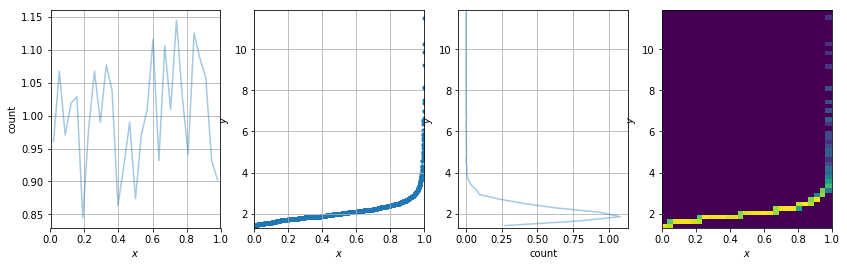

In [6]:

ofname = '182C_PIF7.narrowPeak'

bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="182C"')
bwCurr = bwCurr.query(query__PIF7)
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

! wc -l {' '.join(peakFiles)}
! cat {' '.join(peakFiles)} > {ofname}


cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
bedFile = ofname 

   80455 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S11/1505-ZT12-17C_S11_peaks.narrowPeak
   76231 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S12/1505-Zt12-27C_S12_peaks.narrowPeak
   31335 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S13/1505-ZT0-17C_S13_peaks.narrowPeak
  188021 total


/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


18802 per_FC-GT-0dot9_186C_PIF7.narrowPeak


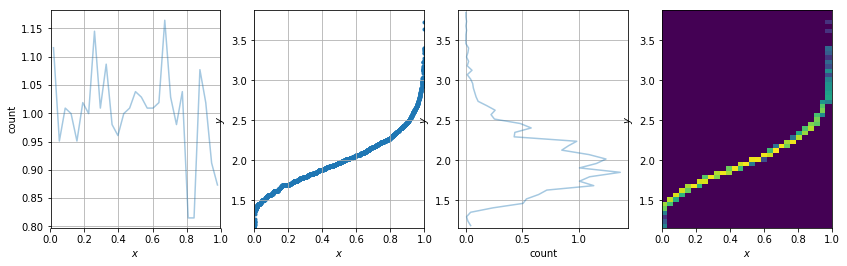

In [7]:

ofname = '186C_PIF7.narrowPeak'

bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="186C"')
bwCurr = bwCurr.query(query__PIF7)
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

! wc -l {' '.join(peakFiles)}
! cat {' '.join(peakFiles)} > {ofname}


cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
bedFile = ofname 